# Exploratory data analysis for vtalks.net

## Table of contents:

* [Introduction](#introduction)
    * [Setup & Configuration](#setup-and-configuration)
    * [Load the Data Set](#load-the-data-set)
    
* [Youtube Statistics Analysis](#youtube-statistics-analysis)
    * [Youtube Views](#youtube-views)
    * [Youtube Likes](#youtube-likes)
    * [Youtube Dislikes](#youtube-dislikes)
    * [Youtube Favorites](#youtube-favorites)
    
* [Statistics Analysis](#statistics-analysis)
    * [Views](#views)
    * [Likes](#likes)
    * [Dislikes](#dislikes)
    * [Favorites](#favorites)
    
* [Youtube Statistics Histograms](#youtube-statistics-histograms)
    * [Youtube Views Histogram](#youtube-views-histogram)
    * [Youtube Likes Histogram](#youtube-likes-histogram)
    * [Youtube Dislikes Histogram](#youtube-dislikes-histogram)
    * [Youtube Favorites Histogram](#youtube-favorites-histogram)
    
* [Statistics Histograms](#statistics-histograms)
    * [Views Histogram](#views-histogram)
    * [Likes Histogram](#likes-histogram)
    * [Dislikes Histogram](#dislikes-histogram)
    * [Favorites Histogram](#favorites-histogram)

## Introduction <a class="anchor" id="introduction"></a>

This jupyter network describes an exploratory data analysis for a data set of talks published on [vtalks.net](http://www.vtalks.net) website.

We are going to use numpy and pandas to load and analyze our dataset, and we will use matplotlib python libraries for
plotting the results.

In [3]:
!pwd

/Users/raul/Projects/vtalks/jupyter


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

Now we configure matplotlib to ensure we have somne pretty plots :)

In [5]:
%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

And finally load our dataset. Notice that there are different data sets available.

The first one is a general data set with all the information available from the start (around mid 2010) until now. Then there are the same data sets but splitted by year.

In [6]:
# data_source = "../.dataset/vtalks_dataset_2018.csv"
# data_source = "../.dataset/vtalks_dataset_2017.csv"
# data_source = "../.dataset/vtalks_dataset_2016.csv"
# data_source = "../.dataset/vtalks_dataset_2015.csv"
# data_source = "../.dataset/vtalks_dataset_2014.csv"
# data_source = "../.dataset/vtalks_dataset_2013.csv"
# data_source = "../.dataset/vtalks_dataset_2012.csv"
# data_source = "../.dataset/vtalks_dataset_2011.csv"
# data_source = "../.dataset/vtalks_dataset_2010.csv"
data_source = "../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int,
    })

In [7]:
data_set.dtypes

id                                 int64
created                   datetime64[ns]
youtube_view_count                 int64
youtube_like_count                 int64
youtube_dislike_count              int64
youtube_favorite_count             int64
view_count                         int64
like_count                         int64
dislike_count                      int64
favorite_count                     int64
dtype: object

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20334 entries, 0 to 20333
Data columns (total 10 columns):
id                        20334 non-null int64
created                   20334 non-null datetime64[ns]
youtube_view_count        20334 non-null int64
youtube_like_count        20334 non-null int64
youtube_dislike_count     20334 non-null int64
youtube_favorite_count    20334 non-null int64
view_count                20334 non-null int64
like_count                20334 non-null int64
dislike_count             20334 non-null int64
favorite_count            20334 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.6 MB


In [9]:
data_set.head()

,id,created,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
0,1,2017-09-19 03:24:39,4017,0,0,0,43,0,0,0
1,2,2017-09-19 03:24:26,2373,0,0,0,79,0,0,0
2,3,2017-09-19 03:24:27,2405,0,0,0,32,0,0,0
3,4,2017-09-19 03:24:28,2430,0,0,0,50,0,0,0
4,5,2017-09-19 03:24:28,3432,0,0,0,43,0,0,0


In [10]:
data_set.describe()

,id,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
count,20334.000000,2.033400e+04,20334.00000,20334.000000,20334.0,20334.000000,20334.000000,20334.000000,20334.000000
mean,10181.567572,3.565610e+03,39.11257,2.028278,0.0,14.350103,0.001426,0.000590,0.000639
std,5873.637497,3.985849e+04,390.70535,42.725312,0.0,11.872966,0.059075,0.051531,0.025277
min,1.000000,0.000000e+00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5097.250000,1.940000e+02,1.00000,0.000000,0.0,7.000000,0.000000,0.000000,0.000000
50%,10182.500000,5.580000e+02,5.00000,0.000000,0.0,13.000000,0.000000,0.000000,0.000000
75%,15265.750000,1.806000e+03,18.00000,1.000000,0.0,17.000000,0.000000,0.000000,0.000000
max,20356.000000,4.039133e+06,36379.00000,4302.000000,0.0,228.000000,7.000000,7.000000,1.000000


In [11]:
pp.ProfileReport(data_set)

Number of variables,10
Number of observations,20334
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,0
Boolean,1
Date,1
Text (Unique),0
Rejected,3


## Youtube Statistics Analysis <a class="anchor" id="youtube-statistics-analysis"></a>

### Youtube Views <a class="anchor" id="youtube-views"></a>

In [12]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_views': data_set.youtube_view_count,
})

#### Descriptive analysis:

##### Count

In [13]:
count = data_set.youtube_view_count.count()
"Count: {:d}".format(count)

'Count: 20334'

##### Minimum, Index Minimum, Maximum, Index Maximum

In [14]:
min = data_set.youtube_view_count.min()
max = data_set.youtube_view_count.max()
index_min = data_set.youtube_view_count.idxmin()
index_max = data_set.youtube_view_count.idxmax()
"Minimum: {:d} Index Minimum: {:d} - Maximum {:d} Index Maximum: {:d}".format(min, index_min, max, index_max)

'Minimum: 0 Index Minimum: 1777 - Maximum 4039133 Index Maximum: 14227'

##### Quantile 50%

In [15]:
quantile = data_set.youtube_view_count.quantile()
"Quantile 50%: {:f}".format(quantile)

'Quantile 50%: 558.000000'

##### Sum

In [16]:
sum = data_set.youtube_view_count.sum()
"Sum: {:d}".format(sum)

'Sum: 72503111'

##### Mean

In [17]:
mean = data_set.youtube_view_count.mean()
"Mean: {:f}".format(mean)

'Mean: 3565.609865'

##### Arithmetic median (50% quantile) of values

In [18]:
median = data_set.youtube_view_count.median()
"Arithmetic median (50% quantile) of values {:f}".format(median)

'Arithmetic median (50% quantile) of values 558.000000'

##### Mean absolute deviation from mean value

In [19]:
mad = data_set.youtube_view_count.mad()
"Mean absolute deviation from mean value {:f}".format(mad)

'Mean absolute deviation from mean value 4811.764366'

##### Product of all values

In [20]:
prod = data_set.youtube_view_count.prod()
"Product of all values {:f}".format(prod)

'Product of all values 0.000000'

##### Sample variance of values

In [21]:
var = data_set.youtube_view_count.var()
"Sample variance of values {:f}".format(var)

'Sample variance of values 1588699450.466339'

##### Sample standard deviation of values

In [22]:
std = data_set.youtube_view_count.std()
"Sample standard deviation of values {:f}".format(std) 

'Sample standard deviation of values 39858.492827'

##### Sample skewness (third moment) of values

In [23]:
skew = data_set.youtube_view_count.skew()
"Sample skewness (third moment) of values {:f}".format(skew)

'Sample skewness (third moment) of values 75.777047'

##### Sample kurtosis (fourth moment) of values

In [24]:
kurt = data_set.youtube_view_count.kurt()
"Sample kurtosis (fourth moment) of values {:f}".format(kurt)

'Sample kurtosis (fourth moment) of values 6790.031700'

##### Cumsum

In [25]:
cumsum = data_set.youtube_view_count.cumsum()
cumsum.head()

0     4017
1     6390
2     8795
3    11225
4    14657
Name: youtube_view_count, dtype: int64

##### Cummin

In [26]:
cummin = data_set.youtube_view_count.cummin()
cummin.head()

0    4017
1    2373
2    2373
3    2373
4    2373
Name: youtube_view_count, dtype: int64

##### Cummax

In [27]:
cummax = data_set.youtube_view_count.cummin()
cummax.head()

0    4017
1    2373
2    2373
3    2373
4    2373
Name: youtube_view_count, dtype: int64

##### Cumprod

In [28]:
cumprod = data_set.youtube_view_count.cumprod()
cumprod.head()

0                  4017
1               9532341
2           22925280105
3        55708430655150
4    191191334008474800
Name: youtube_view_count, dtype: int64

##### Diff

In [29]:
diff = data_set.youtube_view_count.diff()
diff.head()

0       NaN
1   -1644.0
2      32.0
3      25.0
4    1002.0
Name: youtube_view_count, dtype: float64

##### Percent change

In [30]:
pct_change = data_set.youtube_view_count.pct_change()
pct_change.head()

0         NaN
1   -0.409261
2    0.013485
3    0.010395
4    0.412346
Name: youtube_view_count, dtype: float64

#### Bar Plot

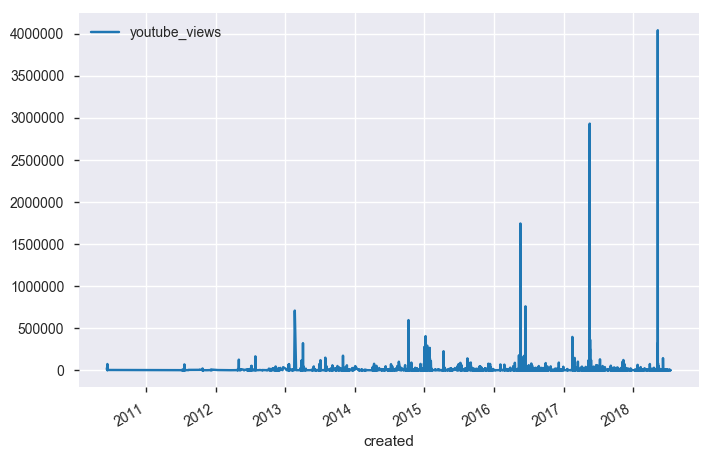

In [31]:
plot_data_set.plot(x='created');

### Youtube Likes <a class="anchor" id="youtube-likes"></a>

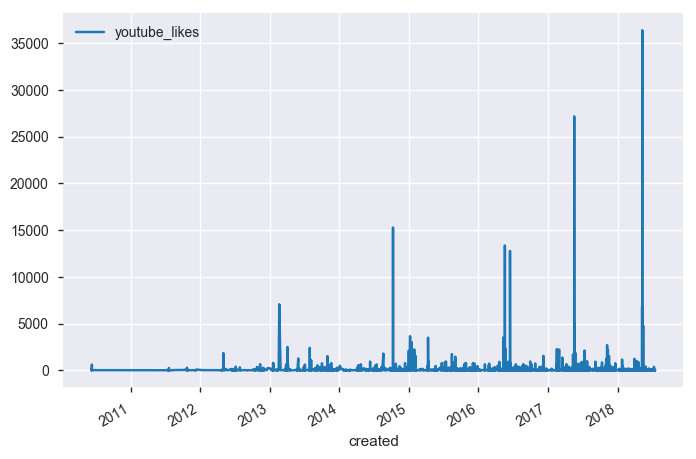

In [48]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_likes': data_set.youtube_like_count,
})
plot_data_set.plot(x='created');

### Youtube Dislikes <a class="anchor" id="youtube-dislikes"></a>

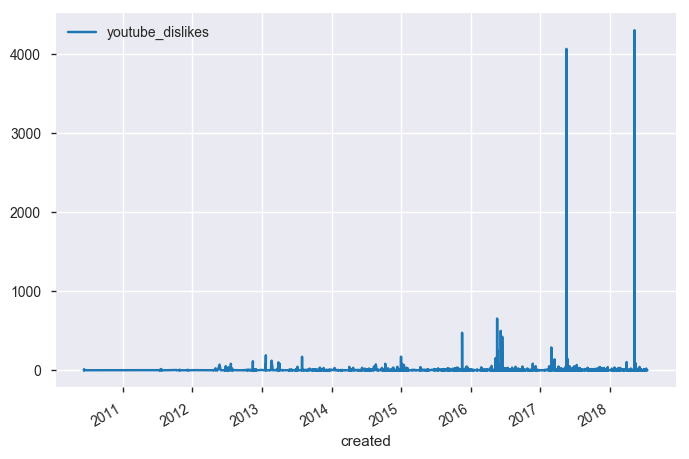

In [33]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_dislikes': data_set.youtube_dislike_count,
})
plot_data_set.plot(x='created');

### Youtube Favorites <a class="anchor" id="youtube-favorites"></a>

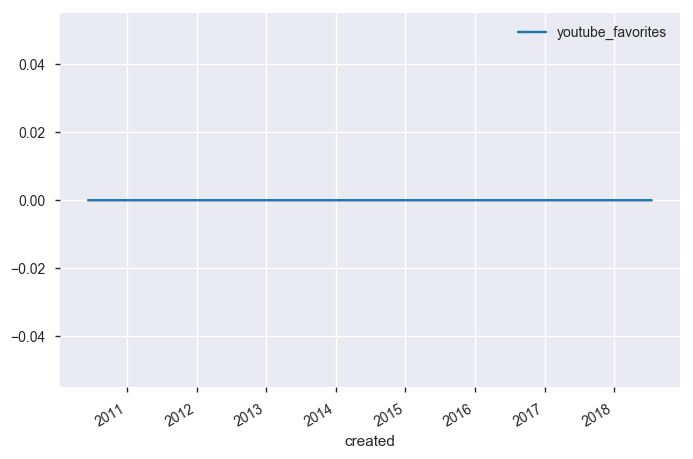

In [34]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_favorites': data_set.youtube_favorite_count,
})
plot_data_set.plot(x='created');

## Statistics Analysis <a class="anchor" id="statistics-analysis"></a>

### Views <a class="anchor" id="views"></a>

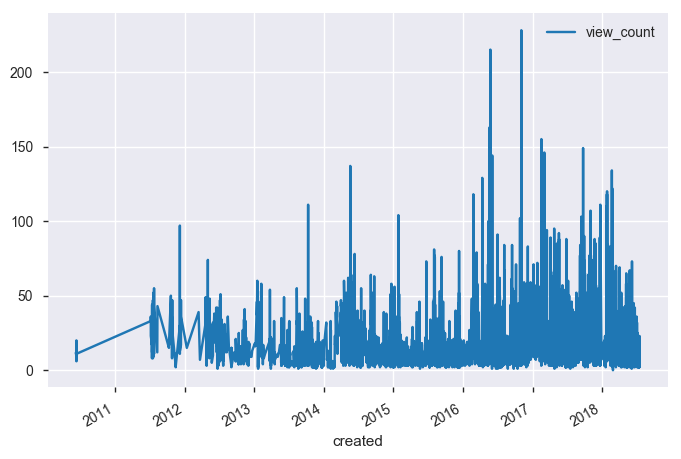

In [35]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'view_count': data_set.view_count,
})
plot_data_set.plot(x='created');

### Likes <a class="anchor" id="likes"></a>

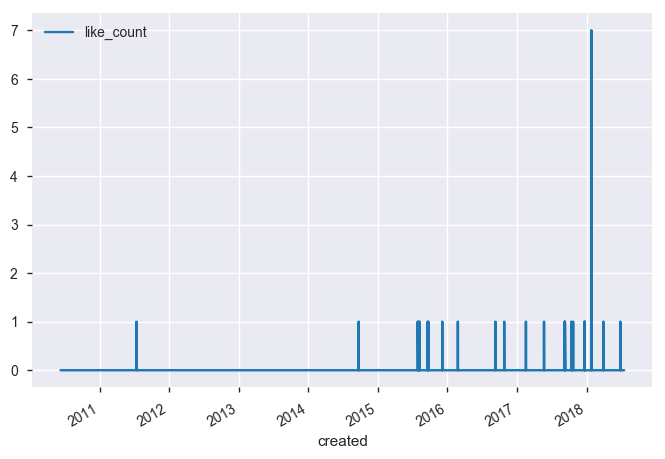

In [36]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'like_count': data_set.like_count,
})
plot_data_set.plot(x='created');

### Dislikes <a class="anchor" id="dislikes"></a>

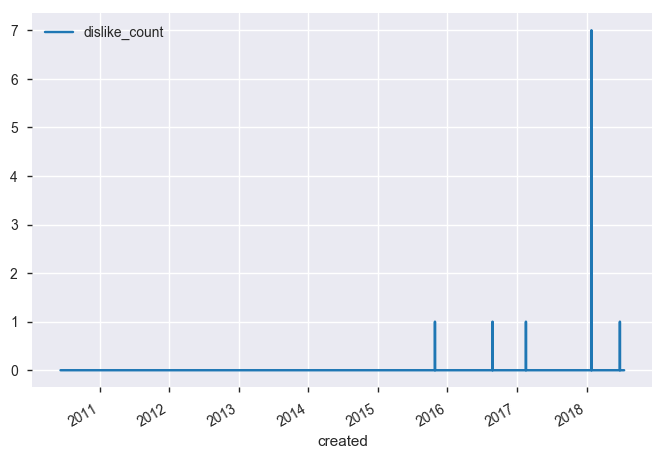

In [37]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'dislike_count': data_set.dislike_count,
})
plot_data_set.plot(x='created');

### Favorites <a class="anchor" id="favorites"></a>

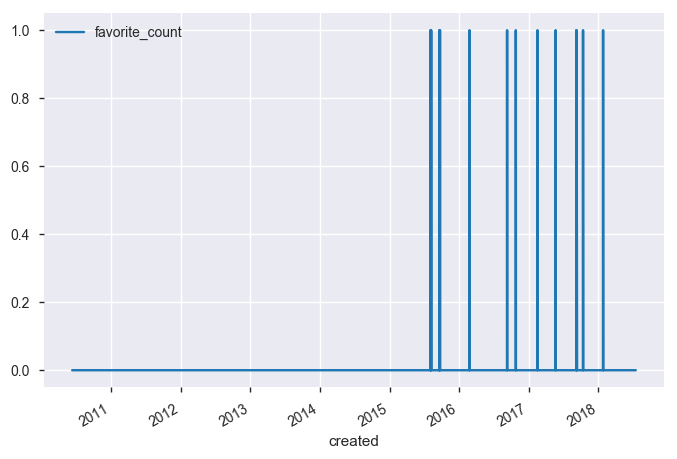

In [38]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'favorite_count': data_set.favorite_count,
})
plot_data_set.plot(x='created');

## Youtube Statistics Histograms <a class="anchor" id="youtube-statistics-histograms"></a>

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

Basically, histograms are used to represent data given in form of some groups. X-axis is about bin ranges where Y-axis talks about frequency.

### Youtube Views Histogram <a class="anchor" id="youtube-views-histogram"></a>

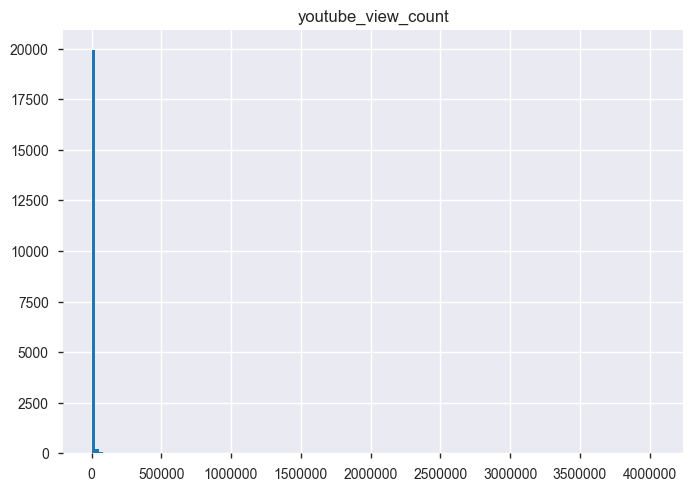

In [39]:
plot_data_set = pd.DataFrame({'youtube_view_count': data_set.youtube_view_count}, columns=['youtube_view_count'])
plot_data_set.hist(bins=150);

### Youtube Like Histogram <a class="anchor" id="youtube-likes-histogram"></a>

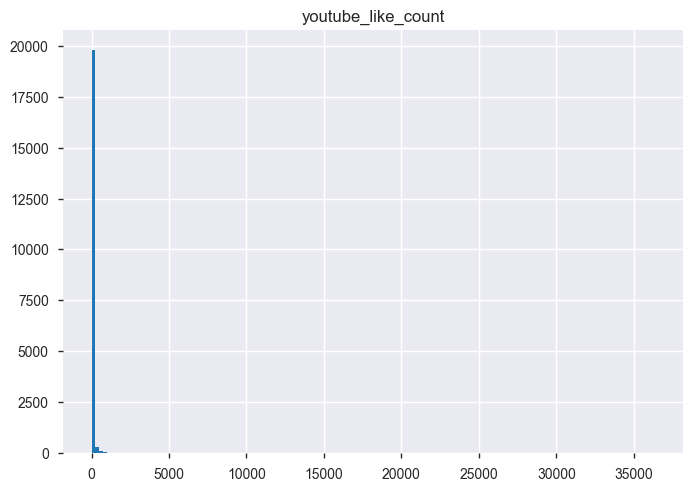

In [40]:
plot_data_set = pd.DataFrame({'youtube_like_count': data_set.youtube_like_count}, columns=['youtube_like_count'])
plot_data_set.hist(bins=150);

### Youtube Dislike Histogram <a class="anchor" id="youtube-dislikes-histogram"></a>

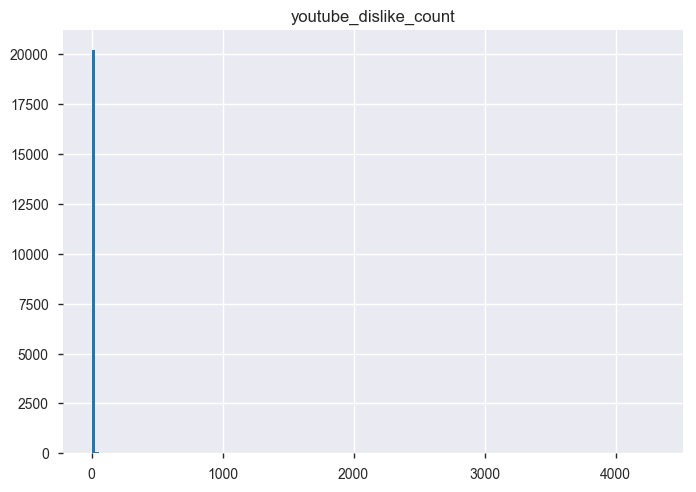

In [41]:
plot_data_set = pd.DataFrame({'youtube_dislike_count': data_set.youtube_dislike_count}, columns=['youtube_dislike_count'])
plot_data_set.hist(bins=150);

### Youtube Favorite Histogram <a class="anchor" id="youtube-favorites-histogram"></a>

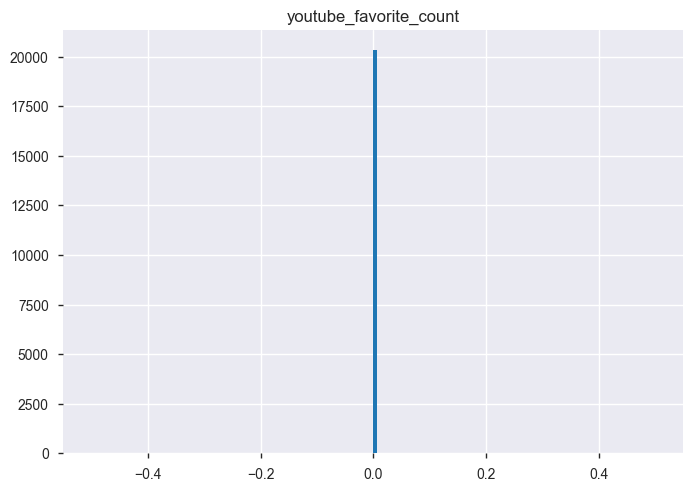

In [42]:
plot_data_set = pd.DataFrame({'youtube_favorite_count': data_set.youtube_favorite_count}, columns=['youtube_favorite_count'])
plot_data_set.hist(bins=150);

## Statistics Histograms <a class="anchor" id="statistics-histogram"></a>

### View Histogram <a class="anchor" id="views-histogram"></a>

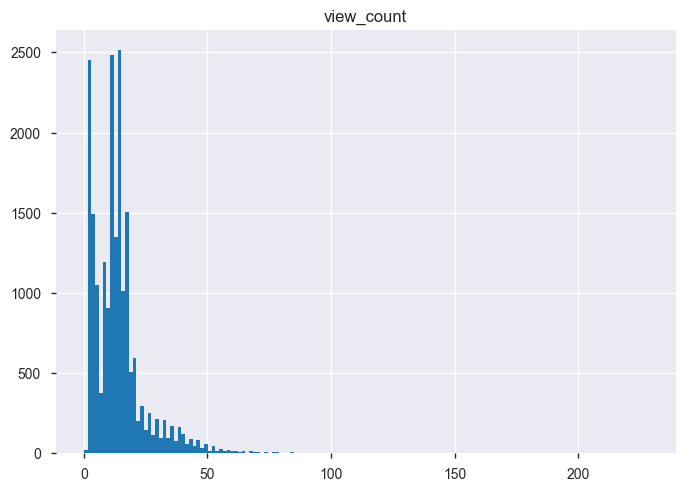

In [43]:
plot_data_set = pd.DataFrame({'view_count': data_set.view_count}, columns=['view_count'])
plot_data_set.hist(bins=150);

### Likes Histogram <a class="anchor" id="likes-histogram"></a>

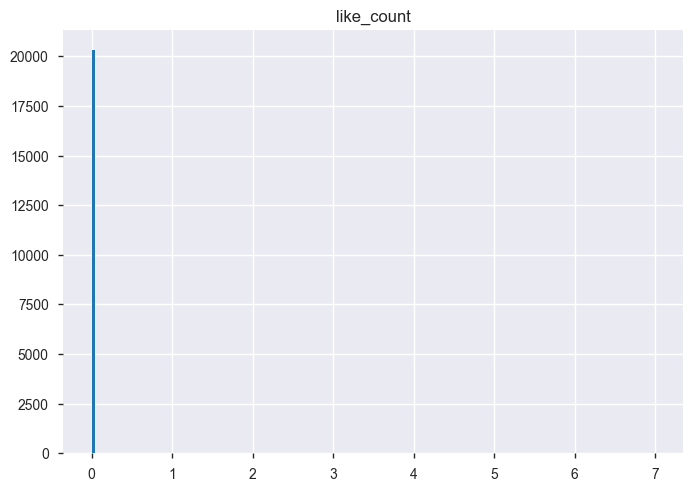

In [44]:
plot_data_set = pd.DataFrame({'like_count': data_set.like_count}, columns=['like_count'])
plot_data_set.hist(bins=150);

### Dislikes Histogram <a class="anchor" id="dislikes-histogram"></a>

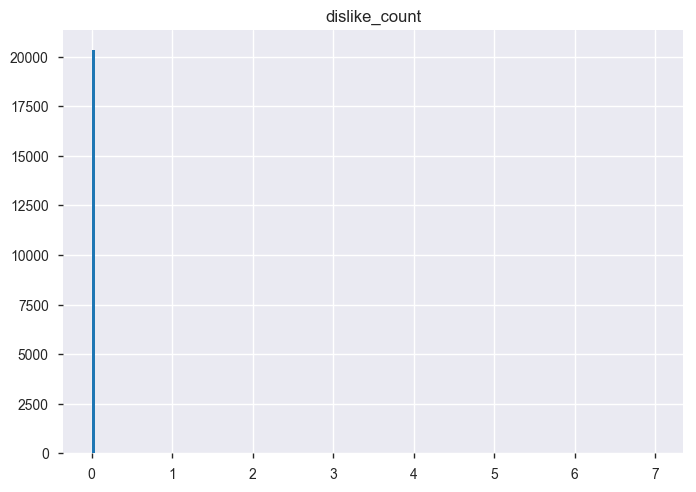

In [45]:
plot_data_set = pd.DataFrame({'dislike_count': data_set.dislike_count}, columns=['dislike_count'])
plot_data_set.hist(bins=150);

### Favorites Histogram <a class="anchor" id="favorites-histogram"></a>

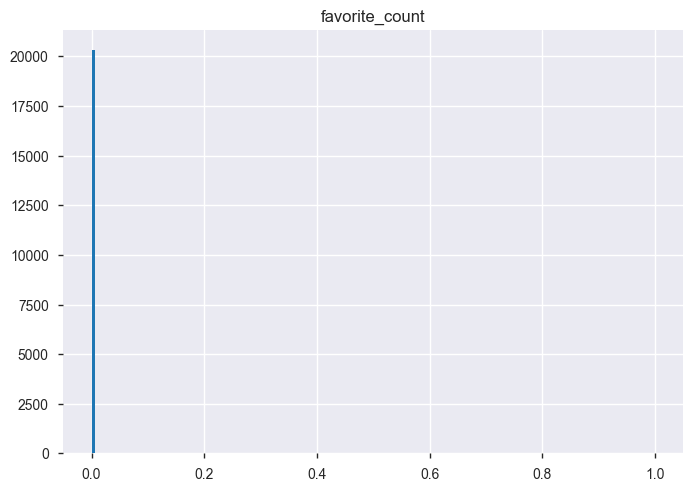

In [46]:
plot_data_set = pd.DataFrame({'favorite_count': data_set.favorite_count}, columns=['favorite_count'])
plot_data_set.hist(bins=150);